In [1]:
import numpy as np
class MLP:
    """
    Create a multi-layer perceptron.

    train_data: A 4x2 matrix with the input data.

    target: A 4x1 matrix with expected outputs

    lr: the learning rate. Defaults to 0.1

    num_epochs: the number of times the training data goes through the model
        while training

    num_input: the number of nodes in the input layer of the MLP.
        Should be equal to the second dimension of train_data.
    
    num_hidden: the number of nodes in the hidden layer of the MLP.

    num_output: the number of nodes in the output layer of the MLP.
        Should be equal to the second dimension of target.
    """
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs
        
        #zeros initialization
#         self.weights_01 = np.zeros((num_input, num_hidden))
#         self.b01 = np.zeros((1,num_hidden) )
#         self.weights_12 = np.zeros((num_hidden, num_output) )
#         self.b12 = np.zeros((1,num_output))
        
        # initialize both sets of weights and biases randomly
            # - weights_01: weights between input and hidden layer
            # - b01: biases for the  hidden layer
            # - weights_12: weights between hidden and output layer
            # - b12: bias for the output layer
        self.weights_01 = np.random.uniform(size=(num_input, num_hidden)) #(2,2)
        self.b01 = np.random.uniform(size=(1,num_hidden)) #(1,2)
        
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output)) #(2,1)
        self.b12 = np.random.uniform(size=(1,num_output)) #(1,1)
        # self.weights_01 = np.random.uniform(size =(num_input,num_hidden))#(2,1)
        # self.b01 = np.random.uniform(size=(1,num_hidden)) #(1,1)
        # self.Print()
        self.losses = []
    def Print(self):
        print(f"Weights are:W1:\n{self.weights_01}\nb1:\n{self.b01}\n")
    
    
    def update_weights(self):
        
        # Calculate the squared error
        loss = 0.5 * (self.target - self.output_final) ** 2
        self.losses.append(np.sum(loss))

        error_term = (self.output_final - self.target) #derivative of error with respect to the last layer

        # the gradient for the output layer weights
        grad12 = error_term * self._delsigmoid(self.output_final)

#         # the gradient for the hidden layer weights
        grad01 = np.dot(grad12, self.weights_12.T) * self. _delsigmoid(self.hidden_out)

        # updating the weights by the learning rate times their gradient
        self.weights_12 -= self.lr * np.dot(self.hidden_out.T, grad12)
        self.weights_01 -= self.lr * np.dot(self.train_data.T, grad01)

        # update the biases the same way
        self.b12 -= self.lr * np.sum(grad12, axis=0)
        self.b01 -= self.lr * np.sum(grad01, axis=0)
    
    def _tanh(self,x):
        return (1.0 - np.exp(-2*x))/(1.0 + np.exp(-2*x))

    def _deltanh(self,x):
        return (1 + x)*(1 - x)


    def _sigmoid(self, x):
        """
        The sigmoid activation function.
        """
        return 1 / (1 + np.exp(-x))

    def _delsigmoid(self, x):
        """
        The first derivative of the sigmoid function wrt x
        """
        return x * (1 - x)

    def forward(self, batch):
        """
        A single forward pass through the network.
        Implementation of wX + b
        """

        self.hidden_ = np.dot(batch, self.weights_01) + self.b01  #batch(4,2), weights01(2,2), b01(1,2)
        self.hidden_out = self. _sigmoid(self.hidden_) #hidden(4,2)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12 #hidden_out(4,2), weights12(2,1), b12(1,1)
        self.output_final = self. _sigmoid(self.output_) #out(4,1) for 4 (x,y) pair we have one xor output (z) 
        # self.output_ = np.dot(batch, self.weights_01) + self.b01 #hidden_out(4,2), weights01(2,1), b01(1,1)
        # self.output_final = self. _sigmoid(self.output_) 
        return self.output_final

    def classify(self, datapoint):
        """
        Return the class to which a datapoint belongs based on
        the perceptron's output for that point.
        """
        #datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0
    
   

    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

    def train(self):
        """
        Train an MLP. Runs through the data num_epochs number of times.
        A forward pass is done first, followed by a backward pass (backpropagation)
        where the networks parameter's are updated.
        """
        for epoch in range(self.num_epochs):

            self.forward(self.train_data)
            self.update_weights()
            
            if epoch % 500 == 0:
                print("Loss: ", self.losses[epoch]) 

In [2]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams["figure.figsize"] = [20, 10]

In [4]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

target_xor = np.array(
    [
        [0],
        [1],
        [1],
        [0]])

target_nand = np.array(
    [
        [1],
        [1],
        [1],
        [0]])

target_or = np.array(
    [
        [0],
        [1],
        [1],
        [1]])

target_and = np.array(
    [
        [0],
        [0],
        [0],
        [1]])

In [5]:
mlp = MLP(train_data, target_xor, 0.2, 10000)
mlp.train()

Loss:  0.6052002869909592
Loss:  0.4996961741461112
Loss:  0.4987406928879106
Loss:  0.4918157285610196
Loss:  0.43990533428159356
Loss:  0.3504687331683362
Loss:  0.1709022677349256
Loss:  0.04477947223066987
Loss:  0.020954654794863175
Loss:  0.013035188902119701
Loss:  0.009286645720156193
Loss:  0.007146190399562238
Loss:  0.005776554698585276
Loss:  0.00483091037137844
Loss:  0.004141614707066362
Loss:  0.003618369351236041
Loss:  0.00320847487273414
Loss:  0.002879213982778419
Loss:  0.0026092524552508503
Loss:  0.002384111511091292


In [6]:
print(np.shape(mlp.b01))
print(mlp.output_final)
mlp.classify([1,1])

(1, 2)
[[0.03565149]
 [0.96835612]
 [0.96836597]
 [0.03339004]]


0

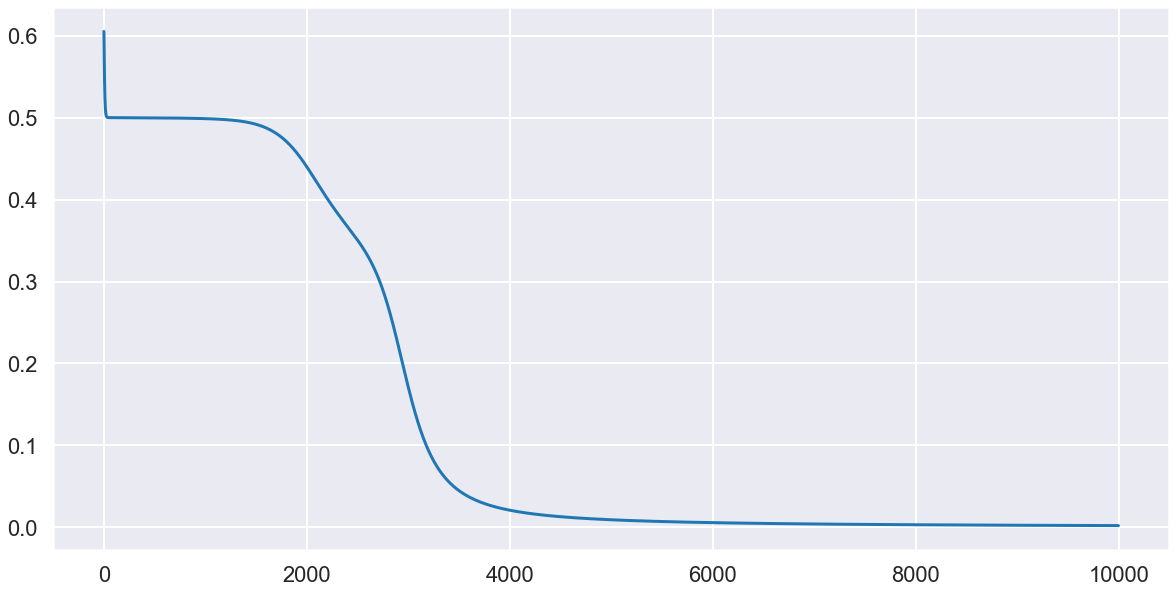

In [7]:
_ = plt.plot(mlp.losses)

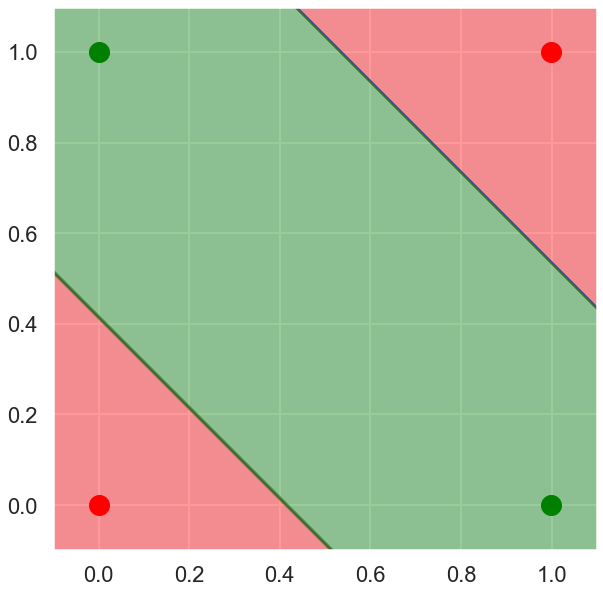

In [8]:
mlp.plot()

In [9]:
mlp.Print()

Weights are:W1:
[[6.13439815 4.11679424]
 [6.12945468 4.11571337]]
b1:
[[-2.6523151  -6.31511149]]

